In [1]:
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm

%matplotlib inline

In [2]:
baseline_data = pd.read_csv('data/cleaned_kc_house_data.csv')

In [3]:
baseline_data.head(15)

,price,month,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,10,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,538000,12,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,180000,2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,604000,12,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000
4,510000,2,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503
5,1230000,5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0.0,98053,47.6561,-122.005,4760,101930
6,257500,6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0.0,98003,47.3097,-122.327,2238,6819
7,291850,1,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0.0,98198,47.4095,-122.315,1650,9711
8,229500,4,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0.0,98146,47.5123,-122.337,1780,8113
9,323000,3,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0.0,98038,47.3684,-122.031,2390,7570


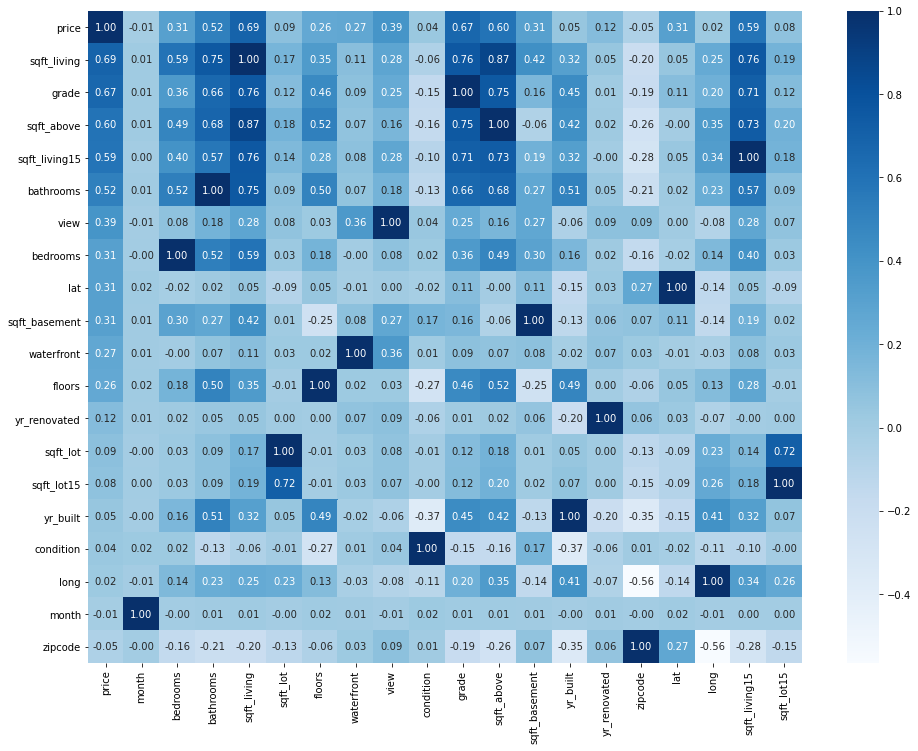

In [4]:
correlation_of_variables = baseline_data.corr()
correlation_of_variables = correlation_of_variables.sort_values(by='price', ascending=False)
#mask = np.triu(np.ones_like(correlation_of_variables, dtype=np.bool))
fig1, ax1 = plt.subplots(figsize=(16, 12))
sns.heatmap(correlation_of_variables, annot=True, annot_kws={'size':10}, fmt='.2f', ax=ax1, cmap='Blues');

In [5]:
target_variable = 'price'
input_variables = baseline_data.drop('price', axis=1).columns
formula = target_variable + '~' + '+'.join(input_variables)

In [6]:
baseline_model = ols(formula=formula, data=baseline_data).fit()
baseline_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.701
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     2633.
Date:                Tue, 21 Sep 2021   Prob (F-statistic):               0.00
Time:                        11:17:54   Log-Likelihood:            -2.8992e+05
No. Observations:               21318   AIC:                         5.799e+05
Df Residuals:                   21298   BIC:                         5.800e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.793e+06   2.87e+06      2.371      0.018    1.18e+06    1.24e+07
month         -3192.2075    428.982     -7.441      0.000   -4033.045   -2351.370
bedrooms      -3.372e+04   1947.530    -17.314      0.000   -3.75e+04   -2.99e+04
bathrooms      3.983e+04   3194.584     12.467      0.000    3.36e+04    4.61e+04
sqft_living      99.0429     17.562      5.640      0.000      64.620     133.466
sqft_lot          0.1327      0.047      2.851      0.004       0.041       0.224
floors         1.106e+04   3508.475      3.153      0.002    4184.039    1.79e+04
waterfront     5.822e+05   1.68e+04     34.560      0.000    5.49e+05    6.15e+05
view           5.419e+04   2050.857     26.423      0.000    5.02e+04    5.82e+04
condition      2.854e+04   2300.369     12.409      0.000     2.4e+04    3.31e+04
grade          9.878e+04   2130.881     46.355      0.000    9.46e+04    1.03e+05
sqft_above       67.5317     17.551      3.848      0.000      33.130     101.934
sqft_basement    40.9877     17.391      2.357      0.018       6.901      75.075
yr_built      -2590.2390     70.288    -36.852      0.000   -2728.009   -2452.469
yr_renovated     23.3637      3.880      6.021      0.000      15.758      30.970
zipcode        -585.8018     32.231    -18.175      0.000    -648.976    -522.627
lat            6.036e+05   1.05e+04     57.649      0.000    5.83e+05    6.24e+05
long          -2.158e+05   1.29e+04    -16.748      0.000   -2.41e+05   -1.91e+05
sqft_living15    27.5946      3.386      8.150      0.000      20.958      34.231
sqft_lot15       -0.3721      0.071     -5.217      0.000      -0.512      -0.232
==============================================================================
Omnibus:                    15441.750   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           813644.811
Skew:                           2.940   Prob(JB):                         0.00
Kurtosis:                      32.689   Cond. No.                     2.16e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<div class="alert alert-block alert-info">
<b><font color="black">Evaluation</font></b>
</div>

- 
- 
- 

 #### Assumption of Normality<br>&emsp;(for Baseline_Model)

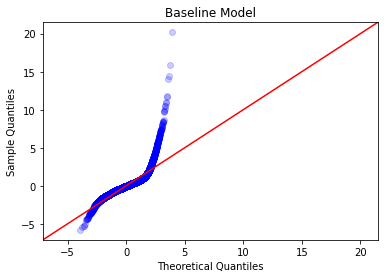

In [8]:
residuals = baseline_model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, fit=True, line='45', alpha=0.2)
plt.title('Baseline Model', size=12);

#### Assumption of Homoscedasticity<br>&emsp;(for Baseline_Model)

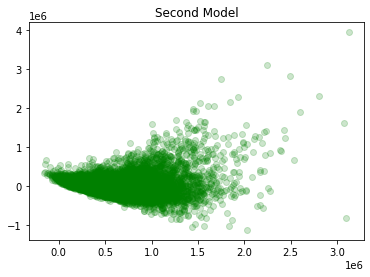

In [9]:
fig1,ax1 = plt.subplots()
ax1.scatter(x=baseline_model.predict(), y=residuals, color='green', alpha=0.2)
plt.title('Second Model', size=12);